### Importing necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Sales files in the folder

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Merging all the sales files

In [3]:
all_sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_sales_data = pd.concat([all_sales_data,df])

In [4]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Exploring the data

In [5]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
# There are 6 columns and 186850 entries in total, out of which each column has 186305 non-null entries.
# This indicates null values present in the dataset.

### Checking entries with null-values in the dataset

In [7]:
all_sales_data[all_sales_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# We have got 545 entries with null values atleast in one column

### Deleting entries will null-values

In [9]:
all_sales_data = all_sales_data.dropna(axis = 0, how = 'any')

In [11]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Checking for consistency in the datatype across column.

In [12]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
# Ideally, Quantity Ordered should be int, Price Each should be int or float and Order Date should be temporal
# however, pd.info() shows object datatype for all of them.

### Lets try converting to appropriate datatype.

In [14]:
# pd.to_numeric(all_sales_data['Quantity Ordered']) - by running this code, we get an error stating pd.to_numeric
# function is not able to covert 'Order Quantity' value at indec 517. This means there are some entries that has
# non_numeric data type.

### Lets locate entries with non_numeric values and filter them out.

In [15]:
all_sales_data[all_sales_data['Quantity Ordered'].str[0:2] == 'Qu']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
# There are 355 entries with bad data

In [17]:
all_sales_data = all_sales_data[all_sales_data['Quantity Ordered'].str[0:2] != 'Qu']

In [18]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Lets try converting to appropriate datatype now.

In [21]:
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])
all_sales_data['Price Each'] = pd.to_numeric(all_sales_data['Price Each'])
all_sales_data['Order Date'] = pd.to_datetime(all_sales_data['Order Date'])

In [20]:
pd.options.mode.chained_assignment = None

In [22]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Augmenting dataset by adding month, year and sales amount columns.

In [23]:
#Creating sales amount column by multiplying order quantity and sales price per qty.

In [24]:
all_sales_data['Sales Amount'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']

In [25]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Sales Amount      185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 11.3+ MB


In [26]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [27]:
#Extracting year from order date column

In [28]:
all_sales_data['Year'] = all_sales_data['Order Date'].dt.year

In [29]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019


In [31]:
#Extracting month from order date column

In [32]:
all_sales_data['Month'] = all_sales_data['Order Date'].dt.month

In [33]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4


In [34]:
#Extracting city and province from the address field

In [35]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].strip()[0:2]

all_sales_data['Cities-Province'] = all_sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [36]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year,Month,Cities-Province
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA)


In [37]:
#Extracting hour from order date column

In [38]:
all_sales_data['Hour'] = all_sales_data['Order Date'].dt.hour

In [40]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year,Month,Cities-Province,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),9


In [41]:
all_sales_data['Minutes'] = all_sales_data['Order Date'].dt.minute

In [42]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year,Month,Cities-Province,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),9,27


### Data Visualization using matplotlib

In [44]:
#Sales trend by hour of a day

In [45]:
sales_by_hour = all_sales_data.groupby('Hour').sum()['Sales Amount']

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

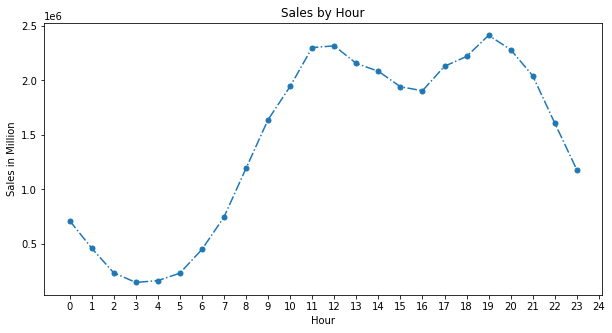

In [47]:
hours = sales_by_hour.index
sales_by_hour

plt.figure(figsize = (10,5))
plt.plot(hours,sales_by_hour,linestyle = '-.', marker = '.', markersize = 10, label = True)

plt.xticks(np.arange(0,25))
plt.xlabel('Hour')
plt.ylabel('Sales in Million')
plt.title('Sales by Hour')


plt.show()

In [48]:
#Qty order trend by hour of a day

In [49]:
order_qty_by_hour = all_sales_data.groupby('Hour').count()['Quantity Ordered']

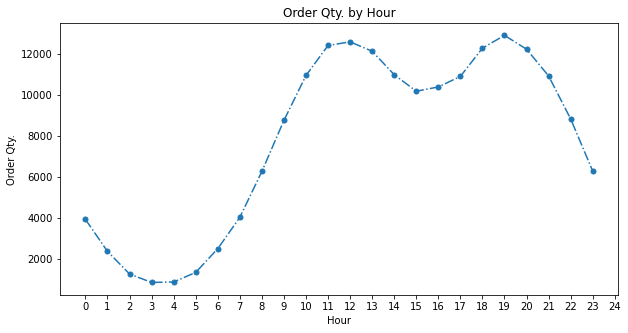

In [50]:
hours = order_qty_by_hour.index
order_qty_by_hour

plt.figure(figsize = (10,5))
plt.plot(hours,order_qty_by_hour,linestyle = '-.',marker = '.', markersize = 10)
plt.xticks(np.arange(0,25))
plt.xlabel('Hour')
plt.ylabel('Order Qty.')
plt.title('Order Qty. by Hour')


plt.show()

In [51]:
# Total Sales and Qty. Ordered by Product Type.

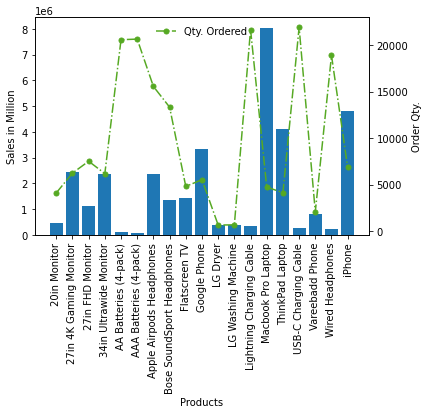

In [52]:
sales_by_product = all_sales_data.groupby('Product').sum()['Sales Amount']
order_qty_by_product = all_sales_data.groupby('Product').count()['Quantity Ordered']

products = sales_by_product.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,sales_by_product)
ax1.set_xlabel('Products')
ax1.set_ylabel('Sales in Million')
ax2.plot(products,order_qty_by_product, linestyle = '-.', marker = '.', markersize = 10, color = '#56A923', label = 'Qty. Ordered')
ax1.set_xticklabels(products, rotation = 'vertical')
ax2.set_ylabel('Order Qty.')
ax2.legend(loc='upper center', framealpha = 0)


plt.show()

In [53]:
#Sales trend by month.

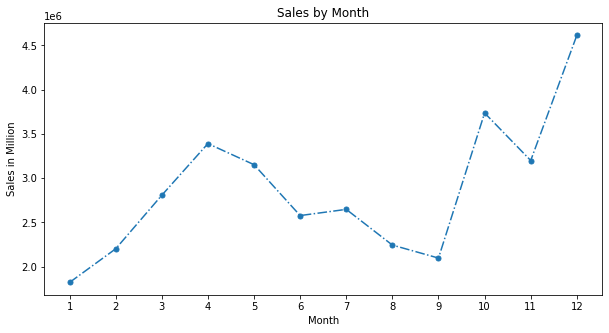

In [54]:
sales_by_months = all_sales_data.groupby('Month').sum()['Sales Amount']

months = sales_by_months.index

plt.figure(figsize = (10,5))
plt.plot(months,sales_by_months,linestyle = '-.',marker = '.', markersize = 10)
plt.xticks(np.arange(1,13))
plt.xlabel('Month')
plt.ylabel('Sales in Million')
plt.title('Sales by Month')


plt.show()

In [55]:
# Total Sales by City-province irrespective of time period

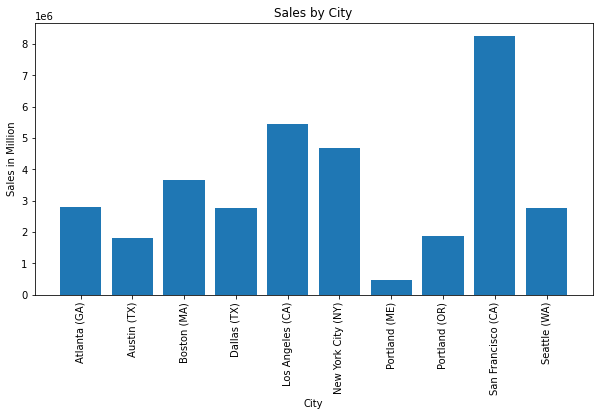

In [56]:
sales_by_cities = all_sales_data.groupby('Cities-Province').sum()['Sales Amount']

cities = sales_by_cities.index

plt.figure(figsize = (10,5))
plt.bar(cities,sales_by_cities)
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('Sales in Million')
plt.title('Sales by City')



plt.show()

In [57]:
# Creating daytime group column from hour column

In [58]:
daytime_conditions = [all_sales_data['Hour'] <= 7,
                      all_sales_data['Hour'] <= 12,
                      all_sales_data['Hour'] <= 16,
                      all_sales_data['Hour'] <= 19,
                      all_sales_data['Hour'] <= 24]

daytime_groups = ['Early Morning', 'Morning', 'Aternoon', 'Evening', 'Night']

In [59]:
all_sales_data['daytime_group'] = np.select(daytime_conditions,daytime_groups)

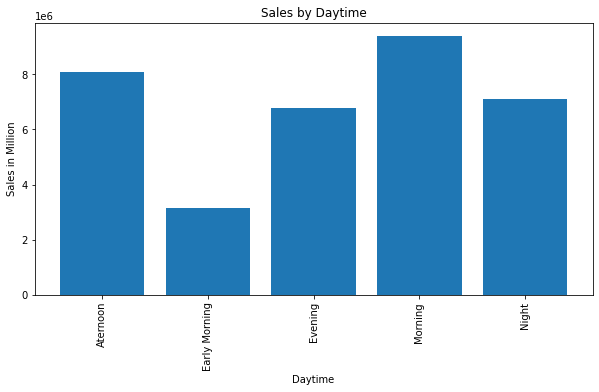

In [60]:
sales_by_daytime = all_sales_data.groupby('daytime_group').sum()['Sales Amount']

daytime = sales_by_daytime.index

plt.figure(figsize = (10,5))
plt.bar(daytime,sales_by_daytime)
plt.xticks(daytime, rotation = 'vertical')
plt.xlabel('Daytime')
plt.ylabel('Sales in Million')
plt.title('Sales by Daytime')



plt.show()

In [62]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Year,Month,Cities-Province,Hour,Minutes,daytime_group
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas (TX),8,46,Morning
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston (MA),22,30,Night
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles (CA),14,38,Aternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),14,38,Aternoon
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles (CA),9,27,Morning


In [63]:
# Sales by City-province across the year.

In [64]:
sales_trend_by_city = all_sales_data.pivot_table(values = 'Sales Amount', columns = 'Cities-Province', index = ['Year', 'Month'], aggfunc='sum')

In [65]:
sales_trend_by_city

Cities-Province  Atlanta (GA)  Austin (TX)  Boston (MA)  Dallas (TX)  \
Year Month                                                             
2019 1              149159.54     87587.08    199761.60    141747.56   
     2              176470.30    108787.40    214808.36    186667.99   
     3              231905.38    154549.27    301023.81    222376.68   
     4              284448.91    172683.59    353807.11    251360.48   
     5              238853.99    160635.22    328803.65    268456.49   
     6              219816.47    144057.29    254747.89    186885.75   
     7              211766.47    150324.93    291497.14    212325.17   
     8              169267.66    125713.61    239275.26    179763.46   
     9              171278.89    106483.70    248408.73    164212.86   
     10             306293.01    203196.12    367036.39    323135.60   
     11             275338.70    171286.47    351546.02    248609.56   
     12             360899.26    233777.09    509599.16    380718.85   
2020 1                    NaN       499.98      1326.89      1714.95   

Cities-Province  Los Angeles (CA)  New York City (NY)  Portland (ME)  \
Year Month                                                             
2019 1                  287601.91           259250.67       22708.80   
     2                  342061.66           305372.26       29845.49   
     3                  429929.37           367262.20       30516.29   
     4                  550264.02           449447.75       42536.49   
     5                  499689.21           436126.40       57978.76   
     6                  451531.93           324148.58       30025.33   
     7                  394334.64           355716.10       32421.14   
     8                  345893.50           303183.46       35996.60   
     9                  354075.69           300563.83       28759.56   
     10                 612453.25           486954.41       52322.52   
     11                 499690.79           428180.32       34681.22   
     12                 684044.84           646770.83       51966.07   
2020 1                     999.99             1340.62            NaN   

Cities-Province  Portland (OR)  San Francisco (CA)  Seattle (WA)  
Year Month                                                        
2019 1                92123.77           433103.45     140542.06  
     2               119606.37           547072.34     171330.25  
     3               156691.72           693726.96     219118.70  
     4               197441.63           812426.19     276254.07  
     5               173729.25           776679.49     211654.29  
     6               139562.02           613173.48     213853.52  
     7               143994.49           642881.76     212513.92  
     8               116881.14           538778.10     189715.09  
     9               103811.88           463595.72     156369.27  
     10              201778.34           866700.98     316856.26  
     11              173210.70           764979.29     252080.13  
     12              251748.04          1106601.27     387317.93  
2020 1                  152.99             2484.88        149.99

In [66]:
#Formating index for x axis labels.

In [67]:
sales_trend_by_city.index

MultiIndex([(2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1)],
           names=['Year', 'Month'])

In [68]:
yr_mn_ct = []
for yr, mn in sales_trend_by_city.index:
    yrmn = "{0} M{1}".format(yr,mn)
    yr_mn_ct.append(yrmn)

In [69]:
yr_mn_ct

['2019 M1',
 '2019 M2',
 '2019 M3',
 '2019 M4',
 '2019 M5',
 '2019 M6',
 '2019 M7',
 '2019 M8',
 '2019 M9',
 '2019 M10',
 '2019 M11',
 '2019 M12',
 '2020 M1']

In [70]:
# Sales trend by city-province.

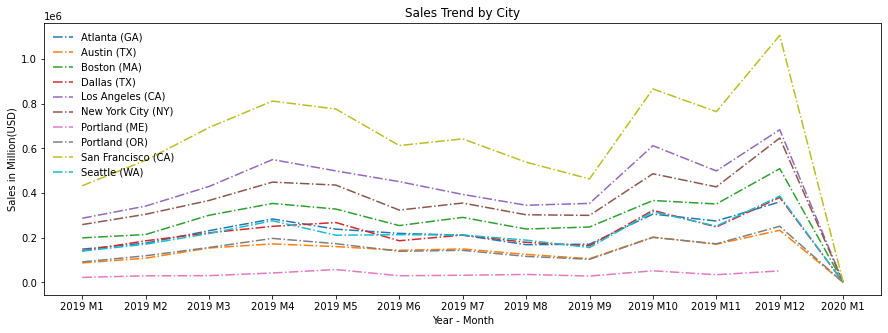

In [73]:
plt.figure(figsize = (15,5))
plt.plot(yr_mn_ct,sales_trend_by_city['Atlanta (GA)'], linestyle = '-.', label = 'Atlanta (GA)')
plt.plot(yr_mn_ct,sales_trend_by_city['Austin (TX)'], linestyle = '-.', label = 'Austin (TX)')
plt.plot(yr_mn_ct,sales_trend_by_city['Boston (MA)'], linestyle = '-.', label = 'Boston (MA)')
plt.plot(yr_mn_ct,sales_trend_by_city['Dallas (TX)'], linestyle = '-.', label = 'Dallas (TX)')
plt.plot(yr_mn_ct,sales_trend_by_city['Los Angeles (CA)'], linestyle = '-.', label = 'Los Angeles (CA)')
plt.plot(yr_mn_ct,sales_trend_by_city['New York City (NY)'], linestyle = '-.', label = 'New York City (NY)')
plt.plot(yr_mn_ct,sales_trend_by_city['Portland (ME)'], linestyle = '-.', label = 'Portland (ME)')
plt.plot(yr_mn_ct,sales_trend_by_city['Portland (OR)'], linestyle = '-.', label = 'Portland (OR)')
plt.plot(yr_mn_ct,sales_trend_by_city['San Francisco (CA)'], linestyle = '-.', label = 'San Francisco (CA)')
plt.plot(yr_mn_ct,sales_trend_by_city['Seattle (WA)'], linestyle = '-.', label = 'Seattle (WA)')

plt.legend(framealpha = 0)
plt.title('Sales Trend by City')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Year - Month')

plt.show()

In [74]:
# Please note that a lot more analysis could be performed on the dataset. These are just few of them. Thank you!